In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import time

In [1]:
left= 630
top= 100
right= 1250
bottom= 1100

In [2]:
start = time.time()
img = cv2.cvtColor(cv2.imread('coral_now.jpg'), cv2.COLOR_BGR2RGB)
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (left,top,right,bottom)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT);
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
end = time.time()
print(end - start)

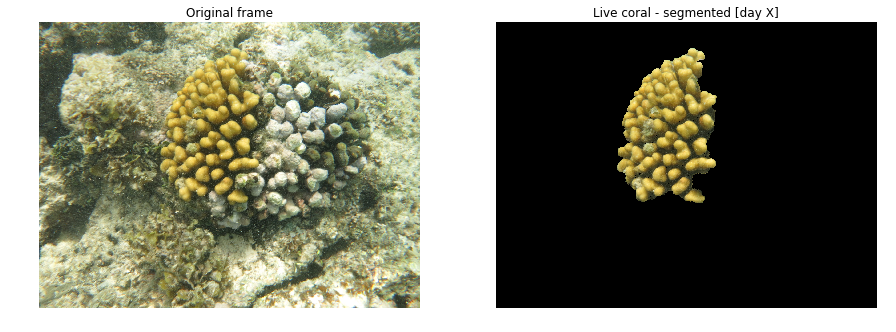

In [4]:
fig = plt.figure(figsize=(15, 15))
ax1=fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread('coral_now.jpg'), cv2.COLOR_BGR2RGB))
plt.axis('off')
ax2=fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.axis('off')

ax1.title.set_text('Original frame')
ax2.title.set_text('Live coral - segmented [day X]')

plt.show()


In [89]:
img_l = cv2.cvtColor(cv2.imread('coral_dx_y.jpeg'), cv2.COLOR_BGR2RGB)
mask = np.zeros(img_l.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (left,top,right,bottom)
cv2.grabCut(img_l,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_l = img_l*mask2[:,:,np.newaxis]

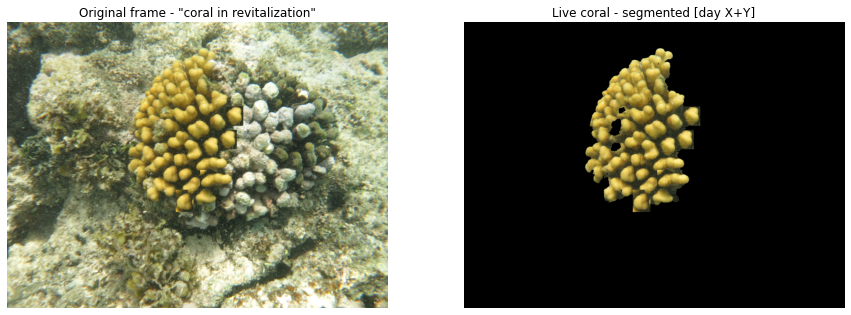

In [109]:
fig = plt.figure(figsize=(15, 15))
ax1=fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread('coral_dx_y.jpeg'), cv2.COLOR_BGR2RGB))
plt.axis('off')
ax2=fig.add_subplot(1, 2, 2)
plt.imshow(img_l)
plt.axis('off')

ax1.title.set_text('Original frame - "coral in revitalization"')
ax2.title.set_text('Live coral - segmented [day X+Y]')

plt.show()


In [94]:
img_m = cv2.cvtColor(cv2.imread('coral_dx_z.jpeg'), cv2.COLOR_BGR2RGB)
mask = np.zeros(img_m.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (left,top,right,bottom)
cv2.grabCut(img_m,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_m = img_m*mask2[:,:,np.newaxis]

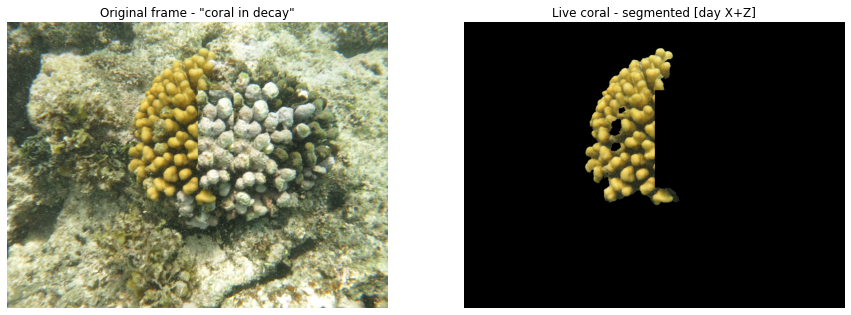

In [108]:
fig = plt.figure(figsize=(15, 15))
ax1=fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread('coral_dx_z.jpeg'), cv2.COLOR_BGR2RGB))
plt.axis('off')
ax2=fig.add_subplot(1, 2, 2)
plt.imshow(img_m)
plt.axis('off')

ax1.title.set_text('Original frame - "coral in decay"')
ax2.title.set_text('Live coral - segmented [day X+Z]')

plt.show()

In [138]:
decay = img_m[img_m > 0]
decay=len(decay)
print(decay)

thriving = img_l[img_l > 0]

thriving=len(thriving)
print(thriving)

original = img[img > 0]
original=len(original)
print(original)

[159 212 158 ...  84  81  36]
[194 226 153 ...  84  81  36]
3416731


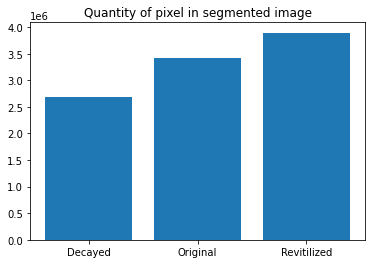

In [141]:
langs = ['Decayed', 'Original', 'Revitilized']
students = [decay,original,thriving]
plt.bar(langs,students)
plt.title('Quantity of pixel in segmented image')
plt.show()

In [174]:
cap = cv2.VideoCapture('video.MOV')
 

prev_frame_time = 0
new_frame_time = 0

result = cv2.VideoWriter('filename.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),10,(500, 300))

result2 = cv2.VideoWriter('filename_mask.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),10,(500, 300))

while(cap.isOpened()):
    ret, frame = cap.read()
    gray = frame
    gray = cv2.resize(gray, (500, 300))
    gray_o = gray
    font = cv2.FONT_HERSHEY_SIMPLEX
    new_frame_time = time.time()
    
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
    fps = int(fps)
    fps = str(fps)

    mask = np.zeros(gray.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (170,96,360,260)
    cv.grabCut(gray,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    gray = gray*mask2[:,:,np.newaxis]    
    newmask = cv2.imread('newmask2.png',0)
    mask[newmask == 0] = 0
    mask[newmask == 255] = 1
    mask, bgdModel, fgdModel = cv.grabCut(gray,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
    mask4  = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    ray = gray*mask4[:,:,np.newaxis]
    
    cv2.putText(gray, fps, (7, 70), font, 3, (100, 255, 0), 3, cv2.LINE_AA)
    
    cv2.imshow('frame', gray)
    cv2.imshow('frame-0', gray_o)
    cv2.imshow('face-0', ray)
    
    result.write(gray_o)
    result2.write(ray)
    

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 

cap.release()
cv2.destroyAllWindows()